# Purpose: Fit post Maunder minimum solar irradiance with periodicities.

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import csv
import sympy as sp
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17Sunlight')

Read in solar irradiance from direct measurements and proxies from 1611-2017

In [2]:
df1 = pd.read_excel('C:\\Users\\cd7\\Desktop\\Heat17Sunlight\\heat18parameters05jan.xlsx')
df1.to_csv('heat19parameters05jan.csv',header=False,index=False)
df1 = pd.read_csv('heat19parameters05jan.csv')
b24 = df1.iloc[23,0:4]
b25 = df1.iloc[24,0:4]
print (b24)
ndrop = 39

df2 = pd.read_excel('C:\\Users\\cd7\\Desktop\\Heat17Sunlight\\heat17dec30irradiance1610-2017.xlsx')
df2.drop(df2.head(ndrop+1).index,inplace=True) # drop last 5 rows
df2.drop(df2.tail(1).index,inplace=True)
df2.index = np.arange(0, len(df2))
print (df2) 
yrs0 = df2.iloc[:,0]
radabsolute = df2.iloc[:,1]
rad0 = radabsolute - np.mean(radabsolute)
print (rad0) 


b1             0.535614
JulianYrEtc     841.916
b3(Years)       1365.57
b4              1365.57
Name: 23, dtype: object
     Year Irradiance
0    1650    1359.66
1    1651    1359.57
2    1652     1359.5
3    1653    1359.45
4    1654    1359.44
5    1655    1359.44
6    1656    1359.44
7    1657    1359.44
8    1658    1359.44
9    1659    1359.44
10   1660    1359.44
11   1661    1359.46
12   1662    1359.45
13   1663    1359.44
14   1664    1359.44
15   1665    1359.44
16   1666    1359.44
17   1667    1359.44
18   1668    1359.44
19   1669    1359.44
20   1670    1359.44
21   1671    1359.45
22   1672    1359.44
23   1673    1359.44
24   1674    1359.44
25   1675    1359.44
26   1676    1359.44
27   1677    1359.44
28   1678    1359.44
29   1679    1359.44
..    ...        ...
338  1988    1360.17
339  1989    1360.13
340  1990    1360.53
341  1991    1360.49
342  1992    1360.49
343  1993    1360.33
344  1994    1360.56
345  1995    1360.26
346  1996     1360.1
347  1997       136

Define the fitted function and use non-linear least square method to fit the historical data

In [3]:
yrs0 = yrs0.tolist()
rad0 = rad0.tolist()
print (b24[1])

def fit01(t,b0,b1,b4,b5,b6,b10,b11):
     y = b0+b1*np.cos(2*np.pi*(t-b24[1])/b24[2])+b4*np.cos(2*np.pi*(t-b5)/b6)+b10*np.exp(-0.5*((t-b11)/5.5)**2)
     return y
# param_bounds=([-10,-10,-10,1000,0,-10,1000,-10,1000],[10,10,10,2000,500,10,2000,10,2500])
param_bounds=([-1,-1,-1,1000,200,0,2000],[1,1,1,2000,300,1,2100])
popt, pcov = curve_fit(fit01, yrs0, rad0, bounds=param_bounds)
print (popt)

def fit02(t,b7,b8):
     y = popt[0]+popt[1]*np.cos(2*np.pi*(t-b24[1])/b24[2])+popt[2]*np.cos(2*np.pi*(t-popt[3])/popt[4])+popt[5]*np.exp(-0.5*((t-popt[6])/5.5)**2)-b7*np.exp(-0.5*((t-b8)/11)**2) 
     return y
param_bounds1=([0,1600],[1,2000])
popt1, pcov1 = curve_fit(fit02, yrs0, rad0, bounds=param_bounds1)
print (popt1)

# def fit0(t,b0,b1,b4,b5,b6,b7,b8,b10,b11):
#      y = b0+b1*np.cos(2*np.pi*(t-b24[1])/b24[2])+b4*np.cos(2*np.pi*(t-b5)/b6)-b7*np.exp(-0.5*((t-b8)/11)**2)+b10*np.exp(-0.5*((t-b11)/5.5)**2)
#      return y
# param_bounds2=([-1,-1,-1,1000,200,0.4,1400,-1,1500],[1,1,1,2000,300,1,2000,1,2500])
# popt2, pcov2 = curve_fit(fit0, yrs0, rad0, bounds=param_bounds2)
# print (popt2)

841.916
[7.82007211e-02 5.93303058e-01 1.22888627e-01 1.55544018e+03
 2.49143921e+02 7.28972375e-01 2.01414187e+03]
[3.07164504e-01 1.85415954e+03]


In [4]:
add = -np.mean(rad0[0:100])
# add = []
# add = add.append(add0)
# print (type(add0))
# print (add0)
# add = [0.43726109382390177]
print (add)

0.43726109382390177


In [5]:
nave = 11
yrs0 = yrs0[0:-5]
partitionyrs0 = [yrs0[i:i+nave] for i in range(0, len(yrs0), nave)]
#print(partitionyrs0)
# y1 = np.mean(partitionyrs0[0])
yrs0ave = [None] * (len(partitionyrs0))
for i in range(0,len(partitionyrs0)):
    yrs0ave[i] = np.mean(partitionyrs0[i])
# print(len(partitionyrs0)) 
# print (len(yrs0ave))
# print (yrs0ave)
# print (type(rad0[0:-5]))
partitionrad0 = (rad0[0:-5]+add)/4
partitionrad0 = [partitionrad0[i:i+nave] for i in range(0, len(rad0), nave)]
# print (len(partitionyrs0))
# print (partitionrad0)
rad0ave = [None] * (len(partitionrad0)-1)
#print (len(rad0ave))
for i in range(0,len(partitionrad0)-1):
    rad0ave[i] = np.mean(partitionrad0[i])
#print (len(rad0ave))

#rad0ave = rad0ave[0:-1]
#print (rad0ave)

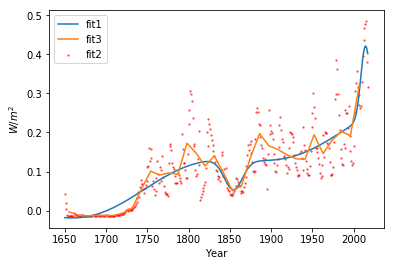

In [6]:
yrs0 = df2.iloc[:,0]
x= yrs0.tolist()
#print (x)
#print (add)
# fit1over4plus = (fit0(x, *popt2) + add)/4
fit1over4plus = (fit02(x, *popt1) + add)/4
#fit1over4plus1 = sp.expand_power_exp(fit1over4plus)
plt.xlabel('Year')
plt.ylabel('$W/m^2$') 
plt.plot(yrs0,fit1over4plus, label="fit1")
plt.scatter(yrs0,(rad0 + add)/4, label="fit2",s=2,color = 'r', alpha = 0.5,marker='o')
plt.plot(yrs0ave,rad0ave, label="fit3")
plt.legend(loc='best')
plt.savefig('sunlight.eps',dpi=1000)
plt.savefig('sunlight.pdf',dpi=1000)
plt.show()